In [ ]:
!pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import activations
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from tensorflow.keras import layers, initializers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset2/public-annotations.csv')
df

,filename,S-A,S-B,S-C,S-D,S-E,S-F,S-Global,J-A,J-B,J-C,J-D,J-E,J-F,J-Global
0,6C94A287-C059-46A0-8600-AFB95F4727B7.jpeg,3,3,3,3,3,3,18,2,3,3,3,3,3,17
1,acute-respiratory-distress-syndrome-ards-1.jpg,3,3,3,3,3,3,18,3,3,3,2,3,3,17
2,16654_4_1.jpg,3,3,3,3,3,2,17,3,3,3,3,3,2,17
3,pneumocystis-pneumonia-12.png,3,3,2,3,2,2,15,3,3,2,3,3,3,17
4,covid-19-pneumonia-12.jpg,2,2,3,2,3,2,14,3,3,3,2,3,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1-s2.0-S1684118220300682-main.pdf-002-a2.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
189,1F6343EE-AFEC-4B7D-97F5-62797EE18767.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190,covid-19-pneumonia-35-2.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import glob

In [ ]:
names = df['filename'].values.tolist()
names

['6C94A287-C059-46A0-8600-AFB95F4727B7.jpeg',
 'acute-respiratory-distress-syndrome-ards-1.jpg',
 '16654_4_1.jpg',
 'pneumocystis-pneumonia-12.png',
 'covid-19-pneumonia-12.jpg',
 'covid-19-pneumonia-58-day-9.jpg',
 'radiol.2020200274.fig3d.png',
 'legionella-pneumonia-2.jpg',
 'covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-3.jpg',
 'covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-2.jpg',
 'covid-19-pneumonia-40.jpg',
 'F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg',
 '31BA3780-2323-493F-8AED-62081B9C383B.jpeg',
 'covid-19-pneumonia-24-day7.jpg',
 'pneumocystis-jirovecii-pneumonia-3-2.jpg',
 '67d668e570c242404ba82c7cbe2ca8f2-0015-0.jpg',
 'covid-19-pneumonia-rapidly-progressive-12-hours.jpg',
 'covid-19-pneumonia-42.jpeg',
 '6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg',
 '2B8649B2-00C4-4233-85D5-1CE240CF233B.jpeg',
 'lancet-case2a.jpg',
 '85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg',
 'covid-19-pneumonia-58-day-10.jpg',
 'covid-19-pneumonia

In [ ]:
Y1 = np.array([df['S-A'].values, df['S-B'].values, df['S-C'].values, df['S-D'].values, df['S-E'].values,df['S-F'].values])
Y1

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 2, ..., 0, 0, 0]])

In [ ]:
Y2 = np.array([df['J-A'].values, df['J-B'].values, df['J-C'].values, df['J-D'].values, df['J-E'].values,df['J-F'].values])
Y2

array([[2, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 2, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 2, ..., 0, 0, 0]])

In [ ]:
Y = (Y1+Y2)/2
Y

array([[2.5, 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 2.5, 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 2. , ..., 0. , 0. , 0. ]])

In [ ]:
Y = Y.astype('float32')
Y

array([[2.5, 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 2.5, 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 2. , ..., 0. , 0. , 0. ]], dtype=float32)

In [ ]:
import cv2
X = []
for file in names:
  image = cv2.imread('/content/drive/MyDrive/dataset2/images/'+file)
  image = cv2.resize(image, (256,256))
  X.append(image)

X = np.array(X)
X.shape

(192, 256, 256, 3)

In [ ]:
X = X.astype('float32')/255
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.25490198, 0.25490198, 0.25490198],
         [0.28627452, 0.28627452, 0.28627452],
         [0.26666668, 0.26666668, 0.26666668]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.30588236, 0.30588236, 0.30588236],
         [0.2901961 , 0.2901961 , 0.2901961 ],
         [0.29803923, 0.29803923, 0.29803923]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.5294118 , 0.5294118 , 0.5294118 ],
         [0.5176471 , 0.5176471 , 0.5176471 ],
         [0.49803922, 0.49803922, 0.49803922]],

        ...,

        [[0.8352941 , 0.8352941 , 0.8352941 ],
         [0.84313726, 0.84313726, 0.84313726]

In [ ]:
def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [ ]:
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
model = load_model('/content/drive/MyDrive/Unet/model.h5', custom_objects={'dice_loss': dice_loss, 'iou':iou})
masks = model.predict(X)

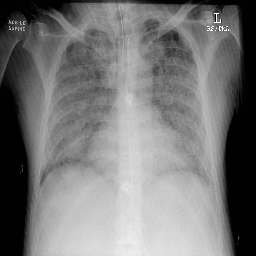

In [ ]:
cv2_imshow(X[1]*255)

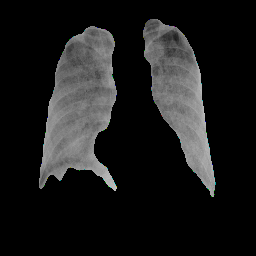

In [ ]:
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    for k in range(X.shape[2]):
      for l in range(3):
        if masks[i][j][k][l]*255<10:
          X[i][j][k][l] =0
cv2_imshow(X[1]*255)     

In [ ]:
def crop_image(image, side):
  smallx = 100000
  smally = 100000
  bigx = 0
  bigy = 0

  for i in range(side.shape[0]):
    for j in range(side.shape[1]):
      if side[i][j]>0:
        smallx = min(smallx, i)
        smally = min(smally, j)
        bigx = max(bigx, i)
        bigy = max(bigy, j)
  
  cropped_image = image[smallx:bigx,smally:bigy]
  return cropped_image

In [ ]:
def preprocess(image, image2):
  image = image*255
  image = np.array(image, dtype=np.uint8)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  contours,_ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = sorted(contours,key=cv2.contourArea, reverse = True)

  peri1 = cv2.arcLength(contours[0], True) 
  conto1 = cv2.approxPolyDP(contours[0], 0.04*peri1, True)
  mask = np.zeros(image.shape,np.uint8)
  left = cv2.drawContours(mask,[conto1],0,255,-1,)
  left = cv2.bitwise_and(image,image,mask=mask)
  x1, y1, _, _ = cv2.boundingRect(contours[0])

  peri2 = cv2.arcLength(contours[1], True) 
  conto2 = cv2.approxPolyDP(contours[1], 0.04*peri1, True)
  mask = np.zeros(image.shape,np.uint8)
  right = cv2.drawContours(mask,[conto2],0,255,-1,)
  right = cv2.bitwise_and(image,image,mask=mask)
  x2, y2, _, _ = cv2.boundingRect(contours[1])

  for i in range(len(right)):
    for j in range(len(right[i])):
      if right[i][j]<100:
        right[i][j] = 0

  for i in range(len(left)):
    for j in range(len(left[i])):
      if left[i][j]<100:
        left[i][j] = 0

  image3 = image2.copy()

  if x1>x2:
    return crop_image(image3, right), crop_image(image2, left)
  return crop_image(image2, left), crop_image(image3, right)

In [ ]:
leftimages = []
rightimages = []
for i in range(X.shape[0]):
  x, y = preprocess(masks[i], X[i])
  leftimages.append(x)
  rightimages.append(y)

In [ ]:
leftimages = np.array(leftimages)
rightimages = np.array(rightimages)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


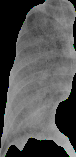

In [ ]:
cv2_imshow(leftimages[1]*255)

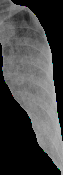

In [ ]:
cv2_imshow(rightimages[1]*255)

In [ ]:
pixelx1 = 0
pixely1 = 0
for i in range(leftimages.shape[0]):
  pixelx1 += leftimages[i].shape[0]
  pixely1 += leftimages[i].shape[1]
pixelx1 /= leftimages.shape[0]
pixely1 /= leftimages.shape[0]
pixelx1 = int(pixelx1+0.5)
pixely1 = int(pixely1+0.5)
print(pixelx1)
print(pixely1)

177
82


In [ ]:
pixelx2 = 0
pixely2 = 0
for i in range(rightimages.shape[0]):
  pixelx2 += rightimages[i].shape[0]
  pixely2 += rightimages[i].shape[1]
pixelx2 /= rightimages.shape[0]
pixely2 /= rightimages.shape[0]
pixelx2 = int(pixelx2+0.5)
pixely2 = int(pixely2+0.5)
print(pixelx2)
print(pixely2)

182
77


In [ ]:
newY = []
newle = []
newri = []
for i in range(leftimages.shape[0]):
  image = leftimages[i]*255
  image = np.array(image, dtype=np.uint8)
  
  image2 = rightimages[i]*255
  image2 = np.array(image2, dtype=np.uint8)

  if image.shape[0]==0 or image.shape[1]==0 or image2.shape[0]==0 or image2.shape[0]==0:
    continue

  image = cv2.resize(image, (pixely1, pixelx1))
  image2 = cv2.resize(image2, (pixely2, pixelx2))
  newle.append(image/255)
  newri.append(image2/255)
  newY.append([Y[0][i], Y[1][i], Y[2][i], Y[3][i], Y[4][i], Y[5][i]])

In [ ]:
Y = np.transpose(newY)
Y

array([[2.5, 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 2.5, 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 3. , ..., 0. , 0. , 0. ],
       [3. , 3. , 2. , ..., 0. , 0. , 0. ]], dtype=float32)

In [ ]:
xleft = int(177*2/5)
xright = int(182*2/5)

In [ ]:
Aimg = newle.copy()
Bimg = newle.copy()
Cimg = newle.copy()
Dimg = newri.copy()
Eimg = newri.copy()
Fimg = newri.copy()

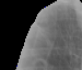

In [ ]:
for i in range(len(Aimg)):
  image = Aimg[i]
  image = Aimg[i][0:xleft]
  Aimg[i] = image

cv2_imshow(Aimg[i]*255)

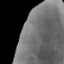

In [ ]:
newAimg = []
for i in range(len(Aimg)):
  image = Aimg[i]*255
  image = cv2.resize(image, (64, 64))
  newAimg.append(image/255)
Aimg = np.array(newAimg)
cv2_imshow(Aimg[i]*255)

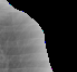

In [ ]:
for i in range(len(Dimg)):
  image = Dimg[i]
  image = Dimg[i][0:xright]
  Dimg[i] = image
cv2_imshow(Dimg[i]*255)

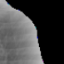

In [ ]:
newDimg = []
for i in range(len(Aimg)):
  image = Dimg[i]*255
  image = cv2.resize(image, (64, 64))
  newDimg.append(image/255)
Dimg = np.array(newDimg)
cv2_imshow(Dimg[i]*255)

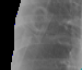

In [ ]:
for i in range(len(Bimg)):
  image = Bimg[i]
  image = Bimg[i][int(3*xleft/4):int(7*xleft/4)]
  Bimg[i] = image
cv2_imshow(Bimg[i]*255)

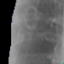

In [ ]:
newBimg = []
for i in range(len(Aimg)):
  image = Bimg[i]*255
  image = cv2.resize(image, (64, 64))
  newBimg.append(image/255)
Bimg = np.array(newBimg)
cv2_imshow(Bimg[i]*255)

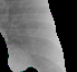

In [ ]:
for i in range(len(Eimg)):
  image = Eimg[i]
  image = Eimg[i][int(3*xright/4):int(7*xright/4)]
  Eimg[i] = image
cv2_imshow(Eimg[i]*255)

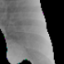

In [ ]:
newEimg = []
for i in range(len(Aimg)):
  image = Eimg[i]*255
  image = cv2.resize(image, (64, 64))
  newEimg.append(image/255)
Eimg = np.array(newEimg)
cv2_imshow(Eimg[i]*255)

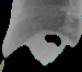

In [ ]:
for i in range(len(Cimg)):
  image = Cimg[i]
  image = Cimg[i][int(3*xleft/2):]
  Cimg[i] = image
cv2_imshow(Cimg[i]*255)

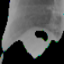

In [ ]:
newCimg = []
for i in range(len(Aimg)):
  image = Cimg[i]*255
  image = cv2.resize(image, (64, 64))
  newCimg.append(image/255)
Cimg = np.array(newCimg)
cv2_imshow(Cimg[i]*255)

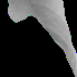

In [ ]:
for i in range(len(Fimg)):
  image = Fimg[i]
  image = Fimg[i][int(3*xleft/2):]
  Fimg[i] = image
cv2_imshow(Fimg[i]*255)

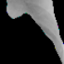

In [ ]:
newFimg = []
for i in range(len(Aimg)):
  image = Fimg[i]*255
  image = cv2.resize(image, (64, 64))
  newFimg.append(image/255)
Fimg = np.array(newFimg)
cv2_imshow(Fimg[i]*255)

In [ ]:
Aimg = np.array(Aimg)
Bimg = np.array(Bimg)
Cimg = np.array(Cimg)
Dimg = np.array(Dimg)
Eimg = np.array(Eimg)
Fimg = np.array(Fimg)
Y = np.array(Y)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
import pickle as pkl
Aimg = []
Bimg = []
Cimg = []
Dimg = []
Eimg = []
Fimg = []
Y = []
pkl.dump(Aimg, open('/content/drive/MyDrive/Aimg.pkl', 'wb'))
pkl.dump(Bimg, open('/content/drive/MyDrive/Bimg.pkl', 'wb'))
pkl.dump(Cimg, open('/content/drive/MyDrive/Cimg.pkl', 'wb'))
pkl.dump(Dimg, open('/content/drive/MyDrive/Dimg.pkl', 'wb'))
pkl.dump(Eimg, open('/content/drive/MyDrive/Eimg.pkl', 'wb'))
pkl.dump(Fimg, open('/content/drive/MyDrive/Fimg.pkl', 'wb'))
pkl.dump(Y, open('/content/drive/MyDrive/Y.pkl', 'wb'))

In [ ]:
import pickle as pkl

pkl.load(Aimg, open('/content/drive/MyDrive/Aimg.pkl', 'wb'))
pkl.load(Bimg, open('/content/drive/MyDrive/Bimg.pkl', 'wb'))
pkl.load(Cimg, open('/content/drive/MyDrive/Cimg.pkl', 'wb'))
pkl.load(Dimg, open('/content/drive/MyDrive/Dimg.pkl', 'wb'))
pkl.load(Eimg, open('/content/drive/MyDrive/Eimg.pkl', 'wb'))
pkl.load(Fimg, open('/content/drive/MyDrive/Fimg.pkl', 'wb'))
pkl.load(Y, open('/content/drive/MyDrive/Y.pkl', 'wb'))

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Aimg, Y[0], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(153, 64, 64, 3)
(153,)
(39, 64, 64, 3)
(39,)


In [ ]:
from tensorflow.keras import applications

In [ ]:
base_model = applications.densenet.DenseNet201(weights=None, include_top=False, input_shape=(64,64,3))
base_model.output

<KerasTensor: shape=(None, 2, 2, 1920) dtype=float32 (created by layer 'relu')>

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
x

<KerasTensor: shape=(None, 1920) dtype=float32 (created by layer 'dropout')>

In [ ]:
pred = Dense(1)(x)
pred

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>

In [ ]:
model_a = Model(inputs=base_model.input, outputs=pred)
model_a.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_a.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 conv2_block4_concat (Concatena  (None, 16, 16, 192)  0          ['conv2_block3_concat[0][0]',    
 te)                                                              'conv2_block4_2_conv[0][0]']    
                                                                                                  
 conv2_block5_0_bn (BatchNormal  (None, 16, 16, 192)  768        ['conv2_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block5_0_relu (Activatio  (None, 16, 16, 192)  0          ['conv2_block5_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

In [ ]:
callbacks = [
             ModelCheckpoint("/content/drive/MyDrive/Unet/Sev_mod_A.h5", verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_a.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 0.9530 - mean_absolute_error: 0.7803
Epoch 1: val_loss improved from inf to 0.69347, saving model to /content/drive/MyDrive/Unet/Sev_mod_A.h5
31/31 [==============================] - 33s 526ms/step - loss: 0.9530 - mean_absolute_error: 0.7803 - val_loss: 0.6935 - val_mean_absolute_error: 0.7326 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - ETA: 0s - loss: 0.6546 - mean_absolute_error: 0.6428
Epoch 2: val_loss improved from 0.69347 to 0.59887, saving model to /content/drive/MyDrive/Unet/Sev_mod_A.h5
31/31 [==============================] - 7s 222ms/step - loss: 0.6546 - mean_absolute_error: 0.6428 - val_loss: 0.5989 - val_mean_absolute_error: 0.6508 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 0.6801 - mean_absolute_error: 0.6436
Epoch 3: val_loss improved from 0.59887 to 0.48979, saving model to /content/drive/MyDrive/Unet/Sev_mod_A.h5
31/31 [===================

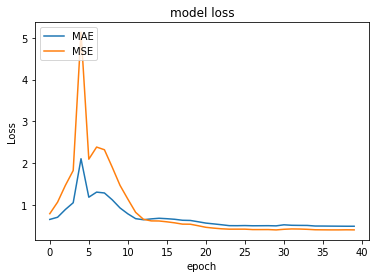

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_mean_absolute_error'][:40])
plt.plot(history.history['val_loss'][:40])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Bimg, Y[1], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(153, 64, 64, 3)
(153,)
(39, 64, 64, 3)
(39,)


In [ ]:
model_b = Model(inputs=base_model.input, outputs=pred)
model_b.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_b.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 conv2_block5_1_conv (Conv2D)   (None, 16, 16, 128)  24576       ['conv2_block5_0_relu[0][0]']    
                                                                                                  
 conv2_block5_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv2_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block5_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv2_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block5_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv2_block5_1_relu[0][0]']    
                                                                                                  
 conv2_blo

In [ ]:
callbacks = [
             ModelCheckpoint("/content/drive/MyDrive/Unet/Sev_mod_B.h5", verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_b.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 0.5616 - mean_absolute_error: 0.6128
Epoch 1: val_loss improved from inf to 1.64024, saving model to /content/drive/MyDrive/Unet/Sev_mod_B.h5
31/31 [==============================] - 33s 411ms/step - loss: 0.5616 - mean_absolute_error: 0.6128 - val_loss: 1.6402 - val_mean_absolute_error: 1.0777 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - ETA: 0s - loss: 0.5718 - mean_absolute_error: 0.6188
Epoch 2: val_loss improved from 1.64024 to 0.74639, saving model to /content/drive/MyDrive/Unet/Sev_mod_B.h5
31/31 [==============================] - 7s 222ms/step - loss: 0.5718 - mean_absolute_error: 0.6188 - val_loss: 0.7464 - val_mean_absolute_error: 0.7127 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 0.5186 - mean_absolute_error: 0.5693
Epoch 3: val_loss improved from 0.74639 to 0.44834, saving model to /content/drive/MyDrive/Unet/Sev_mod_B.h5
31/31 [===================

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Cimg, Y[2], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(153, 64, 64, 3)
(153,)
(39, 64, 64, 3)
(39,)


In [ ]:
model_c = Model(inputs=base_model.input, outputs=pred)
model_c.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_c.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 ization)                                                                                         
                                                                                                  
 conv2_block2_0_relu (Activatio  (None, 16, 16, 96)  0           ['conv2_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block2_1_conv (Conv2D)   (None, 16, 16, 128)  12288       ['conv2_block2_0_relu[0][0]']    
                                                                                                  
 conv2_block2_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv2_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

In [ ]:
callbacks = [
             ModelCheckpoint("/content/drive/MyDrive/Unet/Sev_mod_C.h5", verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_c.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 1.5418 - mean_absolute_error: 1.0027
Epoch 1: val_loss improved from inf to 1.48263, saving model to /content/drive/MyDrive/Unet/Sev_mod_C.h5
31/31 [==============================] - 33s 412ms/step - loss: 1.5418 - mean_absolute_error: 1.0027 - val_loss: 1.4826 - val_mean_absolute_error: 0.9798 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - ETA: 0s - loss: 1.2784 - mean_absolute_error: 0.9358
Epoch 2: val_loss did not improve from 1.48263
31/31 [==============================] - 3s 87ms/step - loss: 1.2784 - mean_absolute_error: 0.9358 - val_loss: 1.6415 - val_mean_absolute_error: 1.0367 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 1.6174 - mean_absolute_error: 1.0412
Epoch 3: val_loss did not improve from 1.48263
31/31 [==============================] - 3s 88ms/step - loss: 1.6174 - mean_absolute_error: 1.0412 - val_loss: 2.4212 - val_mean_absolute_error: 1.3071

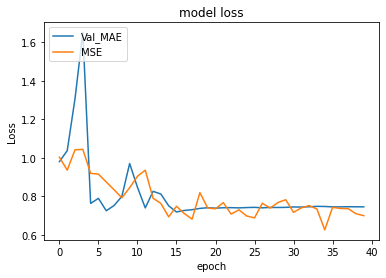

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_mean_absolute_error'][:40])
plt.plot(history.history['mean_absolute_error'][:40])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Val_MAE', 'MSE'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Dimg, Y[3], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(153, 64, 64, 3)
(153,)
(39, 64, 64, 3)
(39,)


In [ ]:
model_d = Model(inputs=base_model.input, outputs=pred)
model_d.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_d.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_concat (Concatena  (None, 16, 16, 160)  0          ['conv2_block2_concat[0][0]',    
 te)                                                              'conv2_block3_2_conv[0][0]']    
                                                                                                  
 conv2_blo

In [ ]:
callbacks = [
             ModelCheckpoint("/content/drive/MyDrive/Unet/Sev_mod_D.h5", verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_d.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 0.8252 - mean_absolute_error: 0.7284
Epoch 1: val_loss improved from inf to 0.87820, saving model to /content/drive/MyDrive/Unet/Sev_mod_D.h5
31/31 [==============================] - 29s 363ms/step - loss: 0.8252 - mean_absolute_error: 0.7284 - val_loss: 0.8782 - val_mean_absolute_error: 0.7555 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - ETA: 0s - loss: 0.9416 - mean_absolute_error: 0.8138
Epoch 2: val_loss did not improve from 0.87820
31/31 [==============================] - 3s 87ms/step - loss: 0.9416 - mean_absolute_error: 0.8138 - val_loss: 1.3896 - val_mean_absolute_error: 0.9989 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 0.9326 - mean_absolute_error: 0.7852
Epoch 3: val_loss improved from 0.87820 to 0.66037, saving model to /content/drive/MyDrive/Unet/Sev_mod_D.h5
31/31 [==============================] - 7s 231ms/step - loss: 0.9326 - mean_absolute_err

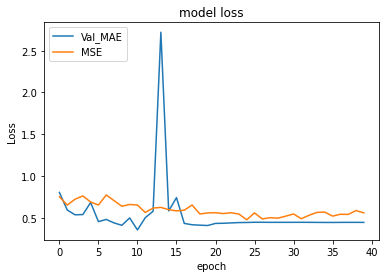

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_mean_absolute_error'][:40])
plt.plot(history.history['mean_absolute_error'][:40])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Val_MAE', 'MSE'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Eimg, Y[4], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(153, 64, 64, 3)
(153,)
(39, 64, 64, 3)
(39,)


In [ ]:
model_e = Model(inputs=base_model.input, outputs=pred)
model_e.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_e.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 n)                                                                                               
                                                                                                  
 conv2_block2_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv2_block2_1_relu[0][0]']    
                                                                                                  
 conv2_block2_concat (Concatena  (None, 16, 16, 128)  0          ['conv2_block1_concat[0][0]',    
 te)                                                              'conv2_block2_2_conv[0][0]']    
                                                                                                  
 conv2_block3_0_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv2_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

In [ ]:
callbacks = [
             ModelCheckpoint("/content/drive/MyDrive/Unet/Sev_mod_E.h5", verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_e.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 1.2354 - mean_absolute_error: 0.9137
Epoch 1: val_loss improved from inf to 0.86906, saving model to /content/drive/MyDrive/Unet/Sev_mod_E.h5
31/31 [==============================] - 31s 469ms/step - loss: 1.2354 - mean_absolute_error: 0.9137 - val_loss: 0.8691 - val_mean_absolute_error: 0.6974 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - ETA: 0s - loss: 0.9000 - mean_absolute_error: 0.7515
Epoch 2: val_loss improved from 0.86906 to 0.81723, saving model to /content/drive/MyDrive/Unet/Sev_mod_E.h5
31/31 [==============================] - 7s 225ms/step - loss: 0.9000 - mean_absolute_error: 0.7515 - val_loss: 0.8172 - val_mean_absolute_error: 0.7816 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 0.9524 - mean_absolute_error: 0.7870
Epoch 3: val_loss did not improve from 0.81723
31/31 [==============================] - 3s 87ms/step - loss: 0.9524 - mean_absolute_err

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Fimg, Y[5], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(153, 64, 64, 3)
(153,)
(39, 64, 64, 3)
(39,)


In [ ]:
model_f = Model(inputs=base_model.input, outputs=pred)
model_f.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_f.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 conv2_block5_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv2_block5_1_relu[0][0]']    
                                                                                                  
 conv2_block5_concat (Concatena  (None, 16, 16, 224)  0          ['conv2_block4_concat[0][0]',    
 te)                                                              'conv2_block5_2_conv[0][0]']    
                                                                                                  
 conv2_block6_0_bn (BatchNormal  (None, 16, 16, 224)  896        ['conv2_block5_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block6_0_relu (Activatio  (None, 16, 16, 224)  0          ['conv2_block6_0_bn[0][0]']      
 n)       

In [ ]:
callbacks = [
             ModelCheckpoint("/content/drive/MyDrive/Unet/Sev_mod_F.h5", verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_f.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 1.1532 - mean_absolute_error: 0.8866
Epoch 1: val_loss improved from inf to 1.23407, saving model to /content/drive/MyDrive/Unet/Sev_mod_F.h5
31/31 [==============================] - 31s 468ms/step - loss: 1.1532 - mean_absolute_error: 0.8866 - val_loss: 1.2341 - val_mean_absolute_error: 0.9050 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - ETA: 0s - loss: 1.0112 - mean_absolute_error: 0.8354
Epoch 2: val_loss did not improve from 1.23407
31/31 [==============================] - 3s 88ms/step - loss: 1.0112 - mean_absolute_error: 0.8354 - val_loss: 2.0072 - val_mean_absolute_error: 1.1622 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 1.0383 - mean_absolute_error: 0.8322
Epoch 3: val_loss improved from 1.23407 to 0.61839, saving model to /content/drive/MyDrive/Unet/Sev_mod_F.h5
31/31 [==============================] - 7s 219ms/step - loss: 1.0383 - mean_absolute_err

In [ ]:
model_a = load_model("/content/drive/MyDrive/Unet/Sev_mod_A.h5")
model_b = load_model("/content/drive/MyDrive/Unet/Sev_mod_B.h5")
model_c = load_model("/content/drive/MyDrive/Unet/Sev_mod_C.h5")
model_d = load_model("/content/drive/MyDrive/Unet/Sev_mod_D.h5")
model_e = load_model("/content/drive/MyDrive/Unet/Sev_mod_E.h5")
model_f = load_model("/content/drive/MyDrive/Unet/Sev_mod_F.h5")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae1 = mean_absolute_error(model_a.predict(Aimg), Y[0])
mae2 = mean_absolute_error(model_b.predict(Bimg), Y[1])
mae3 = mean_absolute_error(model_c.predict(Cimg), Y[2])
mae4 = mean_absolute_error(model_d.predict(Dimg), Y[3])
mae5 = mean_absolute_error(model_e.predict(Eimg), Y[4])
mae6 = mean_absolute_error(model_f.predict(Fimg), Y[5])
print("Mean Absolute Error: ")
print(np.mean([mae1, mae2, mae3, mae4, mae5, mae6]))

KeyError: ignored

In [ ]:
mse1 = mean_squared_error(model_a.predict(Aimg), Y[0])
mse2 = mean_squared_error(model_b.predict(Bimg), Y[1])
mse3 = mean_squared_error(model_c.predict(Cimg), Y[2])
mse4 = mean_squared_error(model_d.predict(Dimg), Y[3])
mse5 = mean_squared_error(model_e.predict(Eimg), Y[4])
mse6 = mean_squared_error(model_f.predict(Fimg), Y[5])
print("Mean Squared Error: ")
print(np.mean([mse1, mse2, mse3, mse4, mse5, mse6]))

In [ ]:
print(mae1)
print(mae2)
print(mae3)
print(mae4)
print(mae5)
print(mae6)

0.46559176
0.7565593
0.7361253
0.87065905
0.4988066
0.6809249


In [ ]:
print(mse1)
print(mse2)
print(mse3)
print(mse4)
print(mse5)
print(mse6)

0.33510423
0.861247
0.74633026
0.9684097
0.38750103
0.6442563


In [ ]:
find_sev(20)

Actual Scores: 1.5 3.0 2.0 1.0 2.0 3.0
Scores Predicted: [[1.4660825]] [[2.1295958]] [[1.8991728]] [[2.0739884]] [[1.9631166]] [[2.106298]]


In [ ]:
base_model = applications.densenet.DenseNet201(weights=None, include_top=False, input_shape=(64,64,3))
base_model.output

<KerasTensor: shape=(None, 2, 2, 1920) dtype=float32 (created by layer 'relu')>

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
x

<KerasTensor: shape=(None, 1920) dtype=float32 (created by layer 'dropout_2')>

In [ ]:
pred = Dense(1)(x)
pred

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [ ]:
model_a = Model(inputs=base_model.input, outputs=pred)
model_a.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_a.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 70, 70, 3)   0           ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_concat (Concatena  (None, 8, 8, 192)   0           ['conv3_block1_concat[0][0]',    
 te)                                                              'conv3_block2_2_conv[0][0]']    
                                                                                                  
 conv3_blo

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Aimg, Y[0], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(153, 64, 64, 3)
(153,)
(39, 64, 64, 3)
(39,)


In [ ]:
callbacks = [
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_a.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

Epoch 1/100
31/31 [==============================] - 30s 199ms/step - loss: 2.6927 - mean_absolute_error: 1.2633 - val_loss: 1.0493 - val_mean_absolute_error: 0.7109 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - 3s 91ms/step - loss: 2.6906 - mean_absolute_error: 1.2783 - val_loss: 1.8389 - val_mean_absolute_error: 1.1151 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - 3s 87ms/step - loss: 3.3923 - mean_absolute_error: 1.3274 - val_loss: 0.7480 - val_mean_absolute_error: 0.6492 - lr: 0.0010
Epoch 4/100
31/31 [==============================] - 3s 91ms/step - loss: 1.9575 - mean_absolute_error: 1.0661 - val_loss: 2.2754 - val_mean_absolute_error: 1.2672 - lr: 0.0010
Epoch 5/100
31/31 [==============================] - 3s 86ms/step - loss: 1.7833 - mean_absolute_error: 1.0333 - val_loss: 2.3587 - val_mean_absolute_error: 1.2962 - lr: 0.0010
Epoch 6/100
31/31 [==============================] - 3s 85ms/step - loss: 1.6296 - mean_absolute_error: 0.9181 - 

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_mean_absolute_error'][:40])
plt.plot(history.history['val_loss'][:40])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Bimg, Y[1], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
model_b = Model(inputs=base_model.input, outputs=pred)
model_b.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_b.summary()

In [ ]:
callbacks = [
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_b.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Cimg, Y[2], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
model_c = Model(inputs=base_model.input, outputs=pred)
model_c.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_c.summary()

In [ ]:
callbacks = [
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_c.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_mean_absolute_error'][:40])
plt.plot(history.history['mean_absolute_error'][:40])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Val_MAE', 'MSE'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Dimg, Y[3], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
model_d = Model(inputs=base_model.input, outputs=pred)
model_d.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_d.summary()

In [ ]:
callbacks = [
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_d.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_mean_absolute_error'][:40])
plt.plot(history.history['mean_absolute_error'][:40])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Val_MAE', 'MAE'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Eimg, Y[4], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
model_e = Model(inputs=base_model.input, outputs=pred)
model_e.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_e.summary()

In [ ]:
callbacks = [
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_e.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Fimg, Y[5], test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
model_f = Model(inputs=base_model.input, outputs=pred)
model_f.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001) , metrics=['mean_absolute_error'])
model_f.summary()

In [ ]:
callbacks = [
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
]

history = model_f.fit(
        x_train, y_train,
        batch_size=5,
        epochs=100,shuffle=True, 
        validation_data=(x_test, y_test),
        callbacks=callbacks)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae1 = mean_absolute_error(model_a.predict(Aimg), Y[0])
mae2 = mean_absolute_error(model_b.predict(Bimg), Y[1])
mae3 = mean_absolute_error(model_c.predict(Cimg), Y[2])
mae4 = mean_absolute_error(model_d.predict(Dimg), Y[3])
mae5 = mean_absolute_error(model_e.predict(Eimg), Y[4])
mae6 = mean_absolute_error(model_f.predict(Fimg), Y[5])
print("Mean Absolute Error: ")
print(np.mean([mae1, mae2, mae3, mae4, mae5, mae6]))

In [ ]:
print(mae1)
print(mae2)
print(mae3)
print(mae4)
print(mae5)
print(mae6)

In [ ]:
def find_sev(i):
  image_a = np.expand_dims(Aimg[i], axis=0)
  image_b = np.expand_dims(Bimg[i], axis=0)
  image_c = np.expand_dims(Cimg[i], axis=0)
  image_d = np.expand_dims(Dimg[i], axis=0)
  image_e = np.expand_dims(Eimg[i], axis=0)
  image_f = np.expand_dims(Fimg[i], axis=0)
  A = model_a.predict(image_a)
  B = model_b.predict(image_b)
  C = model_c.predict(image_c)
  D = model_d.predict(image_d)
  E = model_e.predict(image_e)
  F = model_f.predict(image_f)
  

  print("Actual Scores: "+str(Y[0][i])+" "+str(Y[1][i])+" "+str(Y[2][i])+" "+str(Y[3][i])+" "+str(Y[4][i])+" "+str(Y[5][i]))
  print("Scores Predicted: "+str(A)+" "+str(B)+" "+str(C)+" "+str(D)+" "+str(E)+" "+str(F))

In [ ]:
mse1 = mean_squared_error(model_a.predict(Aimg), Y[0])
mse2 = mean_squared_error(model_b.predict(Bimg), Y[1])
mse3 = mean_squared_error(model_c.predict(Cimg), Y[2])
mse4 = mean_squared_error(model_d.predict(Dimg), Y[3])
mse5 = mean_squared_error(model_e.predict(Eimg), Y[4])
mse6 = mean_squared_error(model_f.predict(Fimg), Y[5])
print("Mean Squared Error: ")
print(np.mean([mse1, mse2, mse3, mse4, mse5, mse6]))

In [ ]:
print(mse1)
print(mse2)
print(mse3)
print(mse4)
print(mse5)
print(mse6)

In [ ]:
find_sev(1)